## Project 2: Binary Classification on ‘Customer_Churn’using Keras

## Table of Contents

1. Problem Statement
2. Project Objective
3. Data Preprocessing
4. Data Description
5. Data Manipulation
6. Data Visualization
7. Model Building
8. Recommendations
9. Conclusion

## Problem Statement

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

## Project Objective

Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction models help in finding out the customer base that are most likely to churn out.

## Data Description

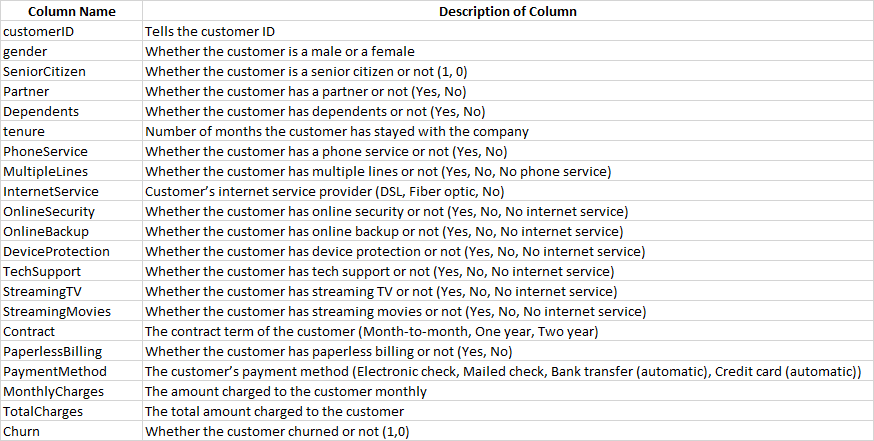

In [6]:
## Importing Librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
##Loading_dataset
df=pd.read_csv("customer_churn.csv")

## A. Data Preprocessing

In [9]:
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.shape

(7043, 21)

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


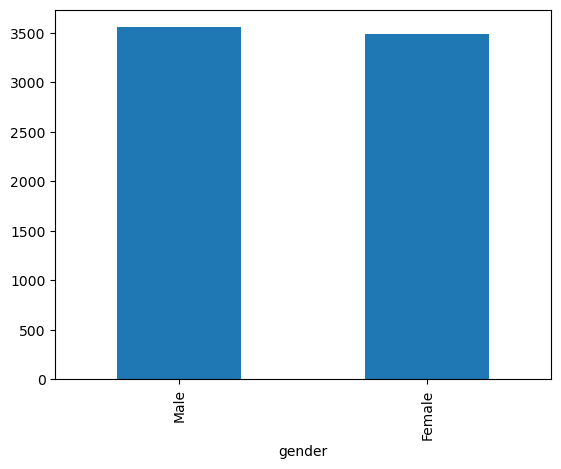

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


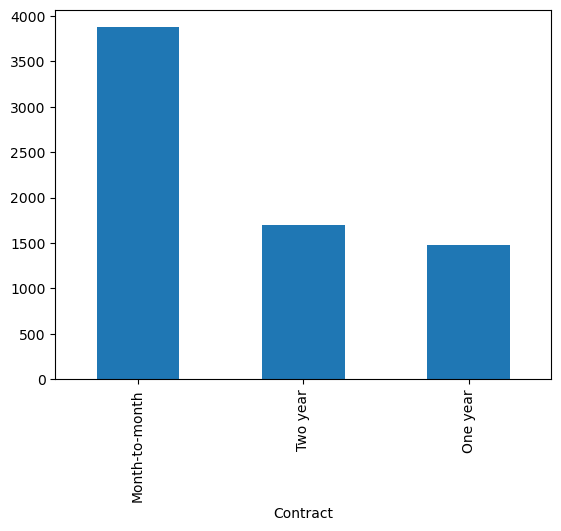

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


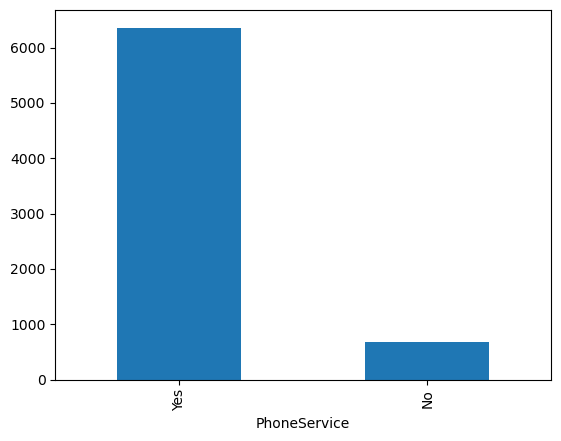

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


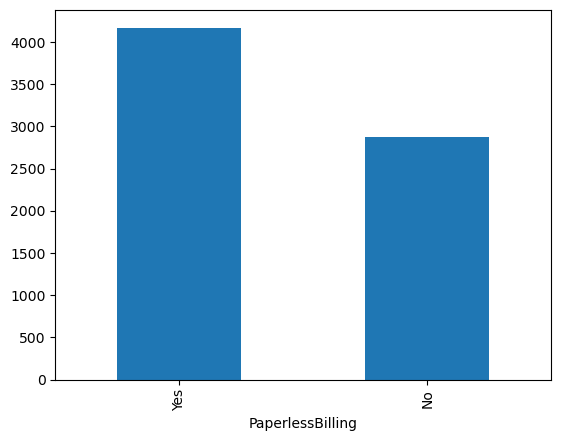

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


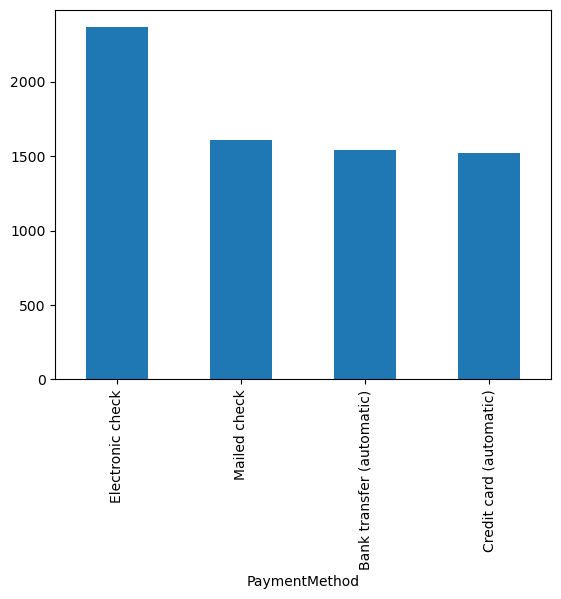

Churn
No     5174
Yes    1869
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


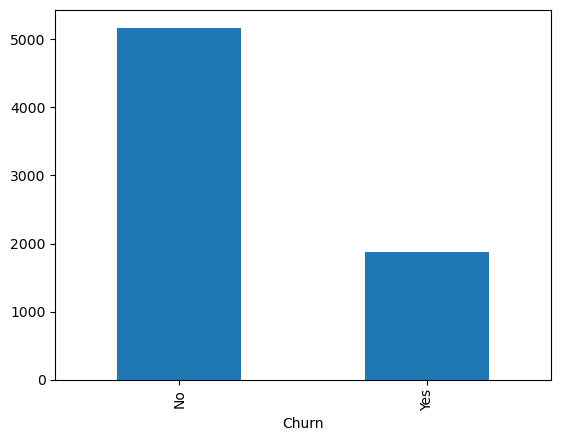

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**************************************************
Axes(0.125,0.11;0.775x0.77)


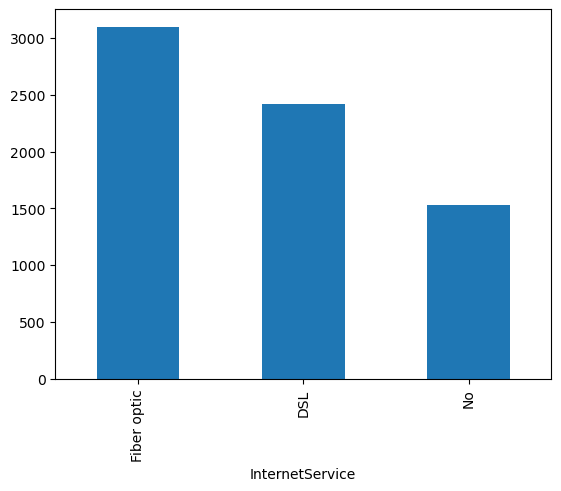

In [15]:
categorical_variable =['gender','Contract', 'PhoneService','PaperlessBilling','PaymentMethod','Churn','InternetService']
for feat in categorical_variable:
    print(df[feat].value_counts())
    print("*"*50)
    print(df[feat].value_counts().plot.bar())
    plt.show()

### B) Data Manipulation:

In [17]:
No_of_male_customers=(df["gender"]=="Male").sum()
print("Total number of male customers = ",No_of_male_customers)

Total number of male customers =  3555


In [18]:
No_of_customers=(df['InternetService']=="DSL").sum()
print("Total number of customers whose Internet Service is ‘DSL’ = ",No_of_customers)

Total number of customers whose Internet Service is ‘DSL’ =  2421


In [19]:
new_customer=df[(df["gender"]=="Female")&(df["SeniorCitizen"]==1)&(df["PaymentMethod"]=="Mailed check")]
new_customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes


In [20]:
new_customer=df[(df["tenure"]<10)|(df["TotalCharges"]<"500")]
new_customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


 ## C) Data Visualization:
a. Build a pie-chart to show the distribution of customers would be churning out

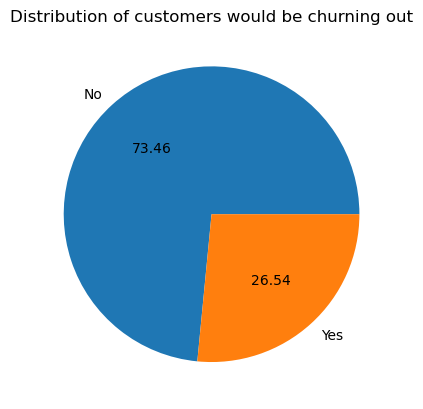

In [22]:
plt.pie(x=df["Churn"].value_counts(),labels=df["Churn"].unique(),autopct="%.2f",data=df)
plt.title("Distribution of customers would be churning out")
plt.show()


## Analysis and interpretation

From above pie chart we could see that from 7043. Almost more than 70% person are not churning out and remaining 26% are churning out.

Text(0, 0.5, 'Count')

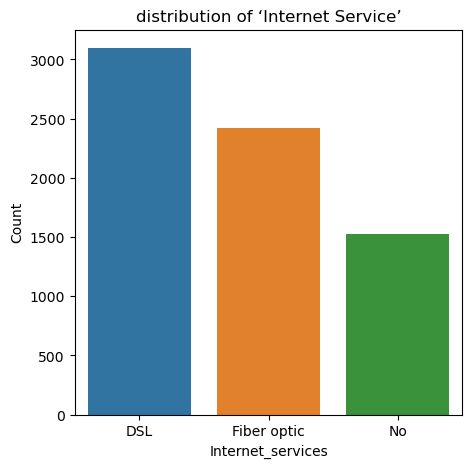

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['InternetService'].value_counts(),x=df['InternetService'].unique())
plt.title("distribution of ‘Internet Service’")
plt.xlabel("Internet_services")
plt.ylabel("Count")

## Analysis and interpretation

 Above chart depicts the distribution of internet services. About 3000 plus people are preferred the "DSL" as the internet services and 1500 people doesn't have any internet services

 ## D) Model Building:
## a. Model-1- Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Churn"]=le.fit_transform(df["Churn"])

In [28]:
x=df[["tenure"]]
y=df[["Churn"]]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
## importing libraries
import tensorflow as tf
from keras.layers import *
from keras.models import Sequential

In [31]:
model1=Sequential()
model1.add(Dense(12,activation="relu",input_dim=(1)))
model1.add(Dense(8,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model1.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [33]:
history=model1.fit(x_train,y_train,epochs=150,batch_size=20,validation_data=[x_test,y_test])

Epoch 1/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7474 - loss: 0.6466 - val_accuracy: 0.7488 - val_loss: 0.5275
Epoch 2/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7507 - loss: 0.5109 - val_accuracy: 0.7488 - val_loss: 0.5276
Epoch 3/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7494 - loss: 0.5129 - val_accuracy: 0.7459 - val_loss: 0.5394
Epoch 4/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.5121 - val_accuracy: 0.7459 - val_loss: 0.5325
Epoch 5/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7481 - loss: 0.5084 - val_accuracy: 0.7459 - val_loss: 0.5265
Epoch 6/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7615 - loss: 0.5009 - val_accuracy: 0.7488 - val_loss: 0.5272
Epoch 7/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7666 - loss: 0.4992 - val_accuracy: 0.7516 - val_loss: 0.5289
Epoch 8/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7520 - loss: 0.5167 - val_accu

In [34]:
y_pred=model1.predict(x_test)
y_pred=le.fit_transform(y_pred)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 3, 78, 28, ..., 82, 53, 82], dtype=int64)

In [35]:
from sklearn.metrics import *
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 4 55  3 ... 16 19 61]
 [ 0  4  0 ... 13 23 82]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


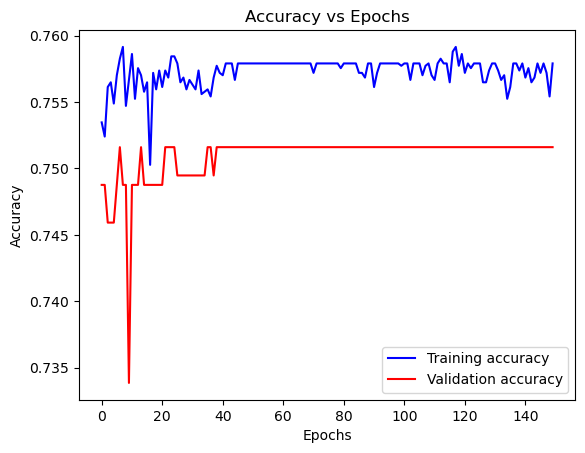

In [36]:
plt.plot(history.history['accuracy'], color='b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

##  Analysis and interpretation

Using the sequential model  of one hidden layer with tenure as feature and Churn as target result about 74% of accuracy. We have taken the "ADAM" as the optimizer and loss as binary crossentropy since output is binary classification. At 39th epoch the training data stopped performing and accuracy become constant. so there is no chance of over fitting. I have also converted the predicted values as categorical since the confusion matrix will not support continuous and classification variables

##  Model 2- Build the 2nd model using same target and feature variables:

In [39]:
model2=Sequential()
model2.add(Dense(12,activation="relu",input_dim=(1)))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
from keras import optimizers
optimizer=optimizers.Adam(learning_rate=0.02)
model2.compile(loss = "binary_crossentropy", optimizer = optimizer,metrics=["accuracy"])

In [41]:
history2=model2.fit(x_train,y_train,epochs=150,batch_size=20,validation_data=[x_test,y_test])

Epoch 1/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6940 - loss: 0.8048 - val_accuracy: 0.7339 - val_loss: 0.5529
Epoch 2/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7366 - loss: 0.5336 - val_accuracy: 0.7339 - val_loss: 0.5533
Epoch 3/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7379 - loss: 0.5498 - val_accuracy: 0.7339 - val_loss: 0.5350
Epoch 4/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7269 - loss: 0.5324 - val_accuracy: 0.7339 - val_loss: 0.5401
Epoch 5/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7330 - loss: 0.5461 - val_accuracy: 0.7339 - val_loss: 0.5434
Epoch 6/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7324 - loss: 0.5399 - val_accuracy: 0.7339 - val_loss: 0.5431
Epoch 7/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7205 - loss: 0.5479 - val_accuracy: 0.7339 - val_loss: 0.5339
Epoch 8/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7338 - loss: 0.5445 - val_accu

In [42]:
y_pred=model2.predict(x_test)
y_pred=le.fit_transform(y_pred)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1034    0]
 [ 375    0]]


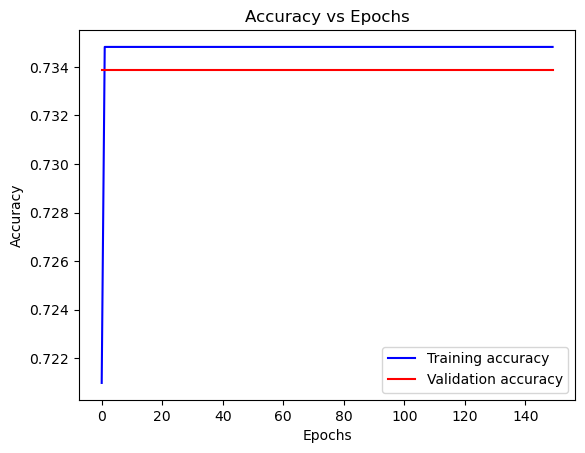

In [44]:
plt.plot(history2.history['accuracy'], color='b', label='Training accuracy')
plt.plot(history2.history['val_accuracy'], color='r', label='Validation accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

##  Analysis and interpretation

Using the  same sequential model  of one hidden layer with tenure as feature and Churn as target result adding the dropout gaves about 73% of accuracy. We have taken the "ADAM" as the optimizer and loss as binary crossentropy since output is binary classification. Both training and validation data shows an constant accuracy and model is not imrpoving. so there is no chance of over fitting. I have also converted the predicted values as categorical since the confusion matrix will not support continuous and classification variables

##  Model-2-C.Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column

In [47]:
df["MonthlyCharges"]=le.fit_transform(df["MonthlyCharges"])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])

In [48]:
x1=df[['tenure', 'MonthlyCharges','TotalCharges']]

In [49]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.2,random_state=42)

In [50]:
model3=Sequential()
model3.add(Dense(12,activation="relu",input_dim=(3)))
model3.add(Dense(8,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()

C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model3.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [52]:
history3=model3.fit(x_train1,y_train1,epochs=150,batch_size=20,validation_data=[x_test1,y_test1])

Epoch 1/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3969 - loss: 173.2246 - val_accuracy: 0.7381 - val_loss: 0.6592
Epoch 2/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7331 - loss: 0.6488 - val_accuracy: 0.7381 - val_loss: 0.6383
Epoch 3/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7523 - loss: 0.6253 - val_accuracy: 0.7374 - val_loss: 0.6121
Epoch 4/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7307 - loss: 0.6102 - val_accuracy: 0.7381 - val_loss: 0.6077
Epoch 5/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7372 - loss: 0.6049 - val_accuracy: 0.7374 - val_loss: 0.5886
Epoch 6/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7339 - loss: 0.5915 - val_accuracy: 0.7388 - val_loss: 0.5809
Epoch 7/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7309 - loss: 0.5843 - val_accuracy: 0.7374 - val_loss: 0.5772
Epoch 8/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7343 - loss: 0.5804 - val_ac

In [53]:
y_pred=model3.predict(x_test1)
y_pred=le.fit_transform(y_pred)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\Reshma\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1070,  108,  237, ...,  536,   71, 1087], dtype=int64)

In [54]:
cm=confusion_matrix(y_test1,y_pred)
print(cm)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


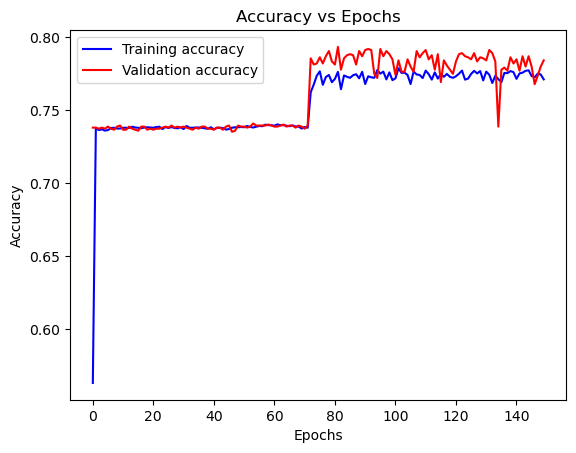

In [55]:
plt.plot(history3.history['accuracy'], color='b', label='Training accuracy')
plt.plot(history3.history['val_accuracy'], color='r', label='Validation accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

##  Analysis and interpretation

With the tenure , Monthly and Total charges as the features with target as Churn, we had an accuracy of 78%.We have taken the "ADAM" as the optimizer and loss as binary crossentropy since output is binary classification.Both training and validation data had been constant for certain period and after that both variables has been increases and model is performing well as well . I have also converted the predicted values as categorical since the confusion matrix will not support continuous and classification variables

## Recommendations

From above models we can choose the model 3 as better one since gave an accuracy of 78% and also model is improving comparing other 2 models which become constant and stop performs at certain epochs.if we add more hidden layers with increased number of node or withn the existing model if we add more nodes,the performance of the model can be increased . We can also try the with different optimizers, loss and metrics as well. For the best model parameters we can have the hypermeter parameter

## Conclusion

Feature Tenure is not alone sufficient to understand the reason for the churning out of customers and that model has provided as an accuracy of 75%. Where as  when we have added other features we could see the model is improving.